In [1]:
import pymongo
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def connecting_db():
    conn = pymongo.MongoClient(
            'localhost',
            27017
    )
    db = conn['houses']
    collection = db['berlin']
    return collection

In [3]:
def giving_training_datas(collection):
    elements= collection.find()
    x_train, y_train= [], []
    for element in elements:
        x_train.append(int(element['size']))
        y_train.append(int(element['price']))
    return x_train, y_train

In [4]:
def arraying_data(x_train, y_train):
    X= np.zeros(len(x_train))
    y= np.zeros(len(y_train))
    for i in range(len(x_train)):
        X[i]= x_train[i]
        y[i]= y_train[i]
    X= X.reshape(-1, 1)
    return X, y

In [5]:
def linear_regression(X, y):
    LR= LinearRegression().fit(X, y)
    return LR

In [6]:
def predict_price(input_size, LR):
    size= np.zeros(1)
    size[0]= input_size
    size= size.reshape(-1, 1)
    price= int(LR.predict(size)[0])
    return print(f'Your predicted price is : {price}')

In [7]:
def draw_prediction_line(X, y, LR):
    print('This is your Regression drawn plot: \n')
    prediction= LR.predict(X)
    plt.plot(X, prediction, label='Linear Regression', c='b',)
    plt.scatter(X, y, label='Training Datas', marker='o', c='g', alpha=.7)
    plt.xlabel('Size in m^2')
    plt.ylabel('Price in $')
    plt.legend()
    plt.show()
    return

In [8]:
x_train, y_train= giving_training_datas(connecting_db())
X, y= arraying_data(x_train, y_train)

In [9]:
input_size= input('What is your size of house that you want to know the price ? \n')
predict_price(input_size, linear_regression(X, y))

What is your size of house that you want to know the price ? 
56
Your predicted price is : 2117


This is your Regression drawn plot: 



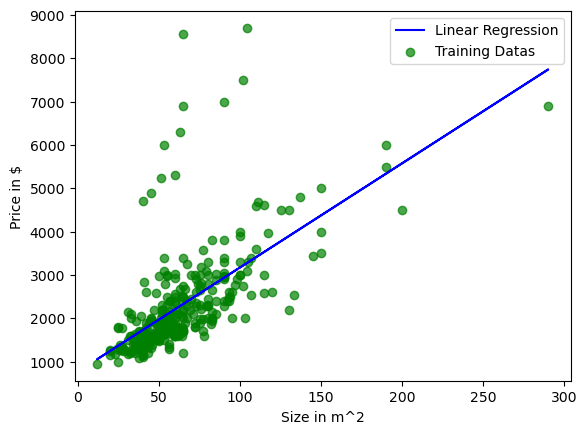

In [101]:
draw_prediction_line(X, y, linear_regression(X, y))

SyntaxError: invalid syntax (717537615.py, line 1)